# Exploration Exercises

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

pd.options.display.float_format = '{:20,.2f}'.format

from wrangle_zillow import prepare_zillow
import wrangle_zillow

## Tips Dataset
Create either a python script or a jupyter notebook named explore_tips that explores the tips data set that is built in to seaborn. Perform at least 1 t-test and 1 chi square test.

You can load the data set like this:

`import seaborn as sns

sns.load_dataset('tips')`

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


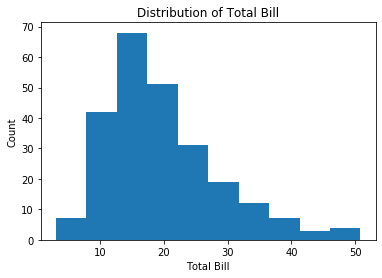

In [4]:
plt.hist(tips.total_bill)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.show()

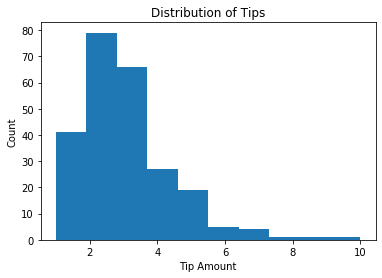

In [5]:
plt.hist(tips.tip)
plt.title('Distribution of Tips')
plt.xlabel('Tip Amount')
plt.ylabel('Count')
plt.show()

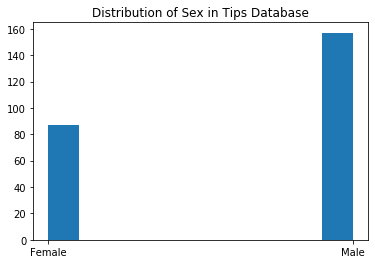

In [6]:
plt.hist(tips.sex)
plt.title('Distribution of Sex in Tips Database')
plt.show()

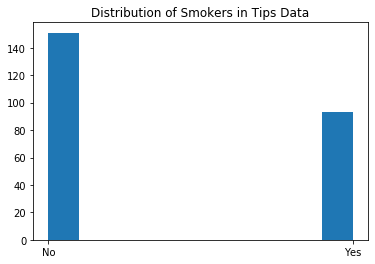

In [7]:
plt.hist(tips.smoker)
plt.title('Distribution of Smokers in Tips Data')
plt.show()

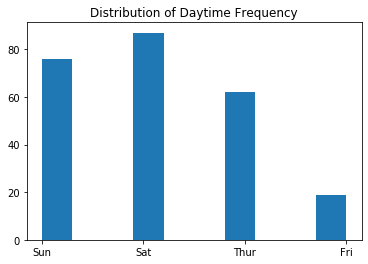

In [8]:
plt.hist(tips.day)
plt.title('Distribution of Daytime Frequency')
plt.show()

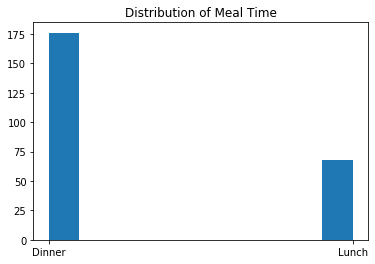

In [9]:
plt.hist(tips.time)
plt.title('Distribution of Meal Time')
plt.show()

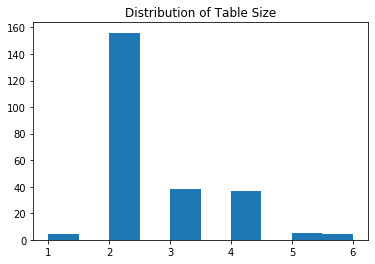

In [10]:
plt.hist(tips['size'])
plt.title('Distribution of Table Size')
plt.show()

### Question One:
Is there a difference in the average total bill between male and female customers?

$H_0$: There is no difference in the mean total bill between male and female customers

$H_a$: There is a difference in the mean total bill between male and female customers

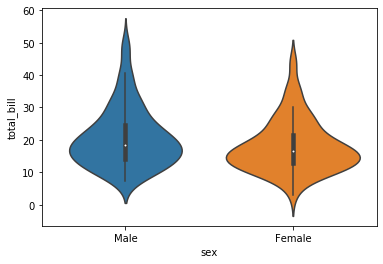

In [11]:
sns.violinplot(x = tips.sex, y = tips.total_bill)

In [12]:
# The data appears to have similar variance between sexes
alpha = 0.05
statistic, p = stats.ttest_ind(tips.total_bill[tips.sex == 'Male'], tips.total_bill[tips.sex == 'Female'])
statistic, p

(2.2777940289803134, 0.0236116668468594)

In [13]:
p < alpha

True

**We reject the null hypothesis. Men have a higher total bill on average than women.**

In [14]:
tips[tips.sex == 'Male'].total_bill.mean()

20.744076433121034

In [15]:
tips[tips.sex == 'Female'].total_bill.mean()

18.056896551724137

### Question Two:
Is smoking status dependent on sex?

$H_0$ A customer's smoking status is independent of their sex  
$H_a$ A customer's smoking status is dependent on their sex

In [16]:
ctab = pd.crosstab(tips.sex, tips.smoker)
ctab

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [17]:
chi2, p, degf, expected = stats.chi2_contingency(ctab)
chi2, p

(0.008763290531773594, 0.925417020494423)

In [18]:
p < alpha

False

**We fail to reject the null hypothesis. Smoking status is independent of sex.**

## Zillow Dataset

In [19]:
train, validate, test = prepare_zillow()

In [20]:
train.head().T

,7561,63729,68688,70148,71810
id,2700737,639102,826154,2696314,1011588
parcelid,10845039,14474251,12006951,14369321,14334565
bathroomcnt,3.00,3.00,2.00,3.00,3.00
bedroomcnt,3.00,3.00,3.00,4.00,3.00
buildingqualitytypeid,8.00,6.64,6.00,6.64,6.64
calculatedfinishedsquarefeet,"1,376.00","2,106.00","1,834.00","2,246.00","2,662.00"
fips,Los Angeles,Orange,Los Angeles,Orange,Orange
fullbathcnt,3.00,3.00,2.00,3.00,3.00
heatingorsystemtypeid,2.00,2.00,7.00,2.00,2.00
latitude,"34,169,700.00","33,612,891.00","34,088,869.00","33,642,328.00","33,763,341.00"


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52538 entries, 7561 to 71294
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52538 non-null  object 
 1   parcelid                      52538 non-null  object 
 2   bathroomcnt                   52538 non-null  float64
 3   bedroomcnt                    52538 non-null  float64
 4   buildingqualitytypeid         52538 non-null  float64
 5   calculatedfinishedsquarefeet  52538 non-null  float64
 6   fips                          52538 non-null  object 
 7   fullbathcnt                   52538 non-null  float64
 8   heatingorsystemtypeid         52538 non-null  float64
 9   latitude                      52538 non-null  float64
 10  longitude                     52538 non-null  float64
 11  lotsizesquarefeet             52538 non-null  float64
 12  propertycountylandusecode     52538 non-null  object 
 13

In [22]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,"52,538.00",2.29,0.95,0.00,2.00,2.00,3.00,13.00
bedroomcnt,"52,538.00",3.03,1.00,1.00,2.00,3.00,4.00,11.00
buildingqualitytypeid,"52,538.00",6.64,1.35,1.00,6.00,6.64,7.00,12.00
calculatedfinishedsquarefeet,"52,538.00","1,765.88",933.06,152.00,"1,175.00","1,530.00","2,081.00","20,612.00"
fullbathcnt,"52,538.00",2.22,0.93,1.00,2.00,2.00,3.00,13.00
heatingorsystemtypeid,"52,538.00",3.24,3.07,1.00,2.00,2.00,2.00,24.00
latitude,"52,538.00","34,006,927.94","269,558.73","33,339,527.00","33,806,528.50","34,019,094.00","34,176,950.00","34,818,767.00"
longitude,"52,538.00","-118,196,980.91","361,329.90","-119,475,265.00","-118,420,061.75","-118,167,860.50","-117,916,201.00","-117,554,636.00"
lotsizesquarefeet,"52,538.00","28,909.97","124,959.26",236.00,"5,999.00","7,283.00","10,900.00","6,971,010.00"
yearbuilt,"52,538.00","1,969.75",23.02,"1,880.00","1,954.00","1,971.00","1,987.00","2,016.00"


Create a python script or jupyter notebook named explore_zillow and do the following:  
- Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
- Answer those questions through a mix of statistical tests and visualizations.

In your exploration, be sure you include the following:  
a plot with at least 3 dimensions, such as x, y, and color.  
at least 3 different types of plots (like box, scatter, bar, ...)  
at least 2 statistical tests.  

- document takeaways/conclusions after each question is addressed.

Bonus:  
Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

## Five Questions:
1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?